In [4]:
df=read.csv('C:/Users/MANI/Documents/R sem 2/logistic_regression/exercises-logistic-regression-exercise-1/exercises-logistic-regression-exercise-1/nba_logreg.csv')


# Problem_statement: To predict the player will be playing after 5 years or not.

In [133]:
head(df)

GP,MIN,PTS,FGM,FGA,FG.,X3P.Made,X3PA,X3P.,FTM,FTA,FT.,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
48,11.5,4.5,1.6,3.0,52.4,0,0.1,0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,0.4,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0


In [ ]:
#df$GP <- factor(df$GP)
#df$X3P.Made <- factor(df$X3P.Made)
#df$X3PA <- factor(df$X3PA)
#df$X3P. <- factor(df$X3P.)
#df$TARGET_5Yrs <- factor(df$TARGET_5Yrs)

# Converting the significant columns into factors for better classification for the model.

# Printing the head of data

In [134]:
str(df)

'data.frame':	1340 obs. of  20 variables:
 $ GP         : Factor w/ 70 levels "11","12","14",..: 24 23 62 46 36 63 50 36 53 30 ...
 $ MIN        : num  27.4 26.9 15.3 11.6 11.5 11.4 10.9 10.3 9.9 8.5 ...
 $ PTS        : num  7.4 7.2 5.2 5.7 4.5 3.7 6.6 5.7 2.4 3.7 ...
 $ FGM        : num  2.6 2 2 2.3 1.6 1.5 2.5 2.3 1 1.4 ...
 $ FGA        : num  7.6 6.7 4.7 5.5 3 3.5 5.8 5.4 2.4 3.5 ...
 $ FG.        : num  34.7 29.6 42.2 42.6 52.4 42.3 43.5 41.5 39.2 38.3 ...
 $ X3P.Made   : Factor w/ 23 levels "0","0.1","0.2",..: 6 8 5 2 1 4 1 5 2 2 ...
 $ X3PA       : Factor w/ 54 levels "0","0.1","0.2",..: 22 29 18 6 2 12 2 16 6 4 ...
 $ X3P.       : Factor w/ 254 levels "0","4.3","4.5",..: 82 72 78 66 1 149 251 125 70 58 ...
 $ FTM        : num  1.6 2.6 0.9 0.9 1.3 0.4 1.5 0.7 0.4 1 ...
 $ FTA        : num  2.3 3.4 1.3 1.3 1.9 0.5 1.8 0.8 0.5 1.4 ...
 $ FT.        : num  69.9 76.5 67 68.9 67.4 73.2 81.1 87.5 71.4 67.8 ...
 $ OREB       : num  0.7 0.5 0.5 1 1 0.2 0.5 0.8 0.2 0.4 ...
 $ DREB       

# Checking the structure of the data

In [8]:
library(Amelia)

# Using library amelia for missing values

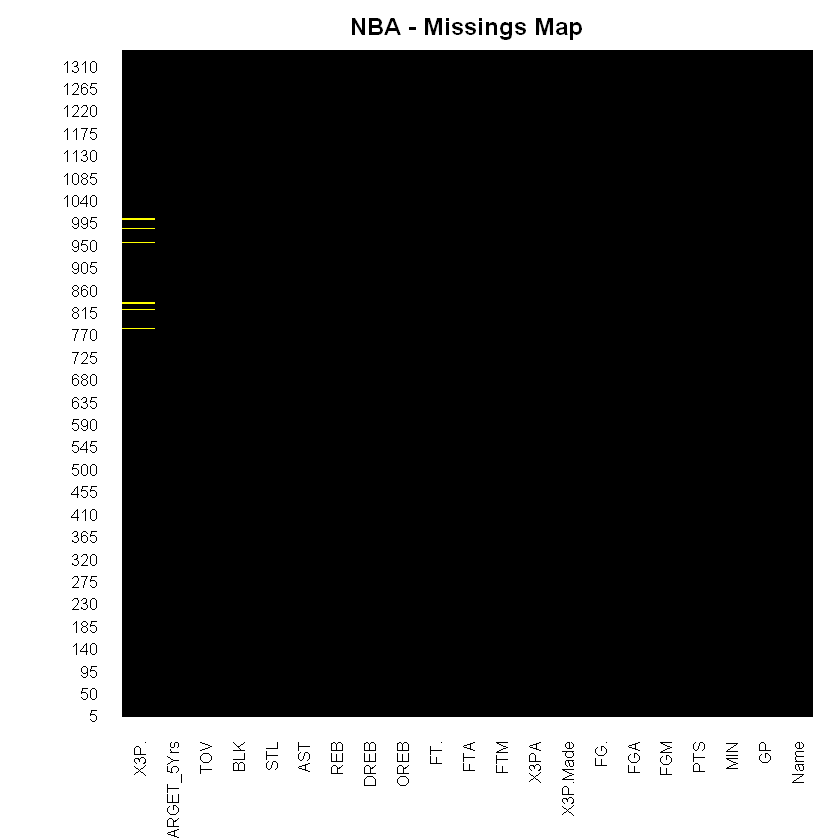

In [10]:
missmap(df, main="NBA - Missings Map", 
        col=c("yellow", "black"), legend=FALSE)

In [11]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


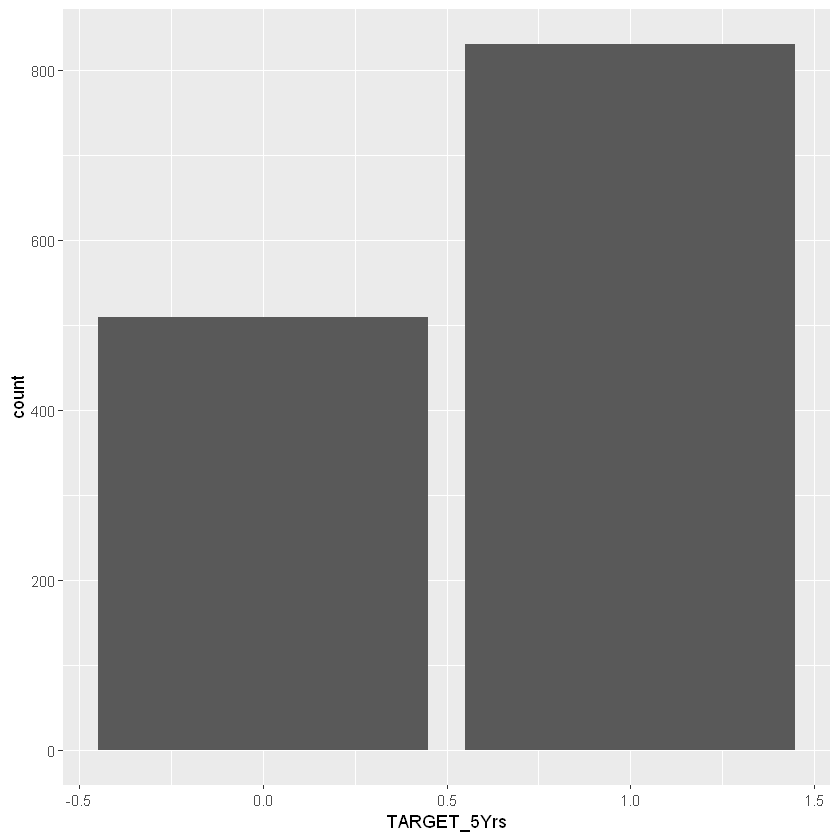

In [14]:
ggplot(df,aes(TARGET_5Yrs)) + geom_bar()

# There are more guys who can play after 5 years also

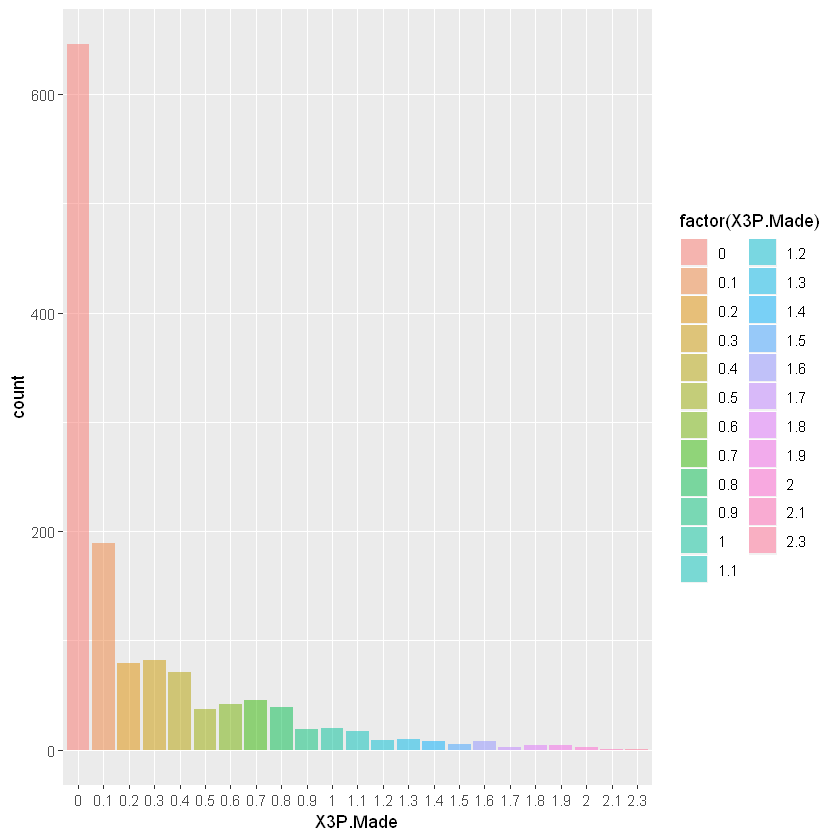

In [144]:
ggplot(df,aes(X3P.Made)) + geom_bar(aes(fill=factor(X3P.Made)),alpha=0.5)

# The above graph is showing the players how many 3 points made by the basket ball players.

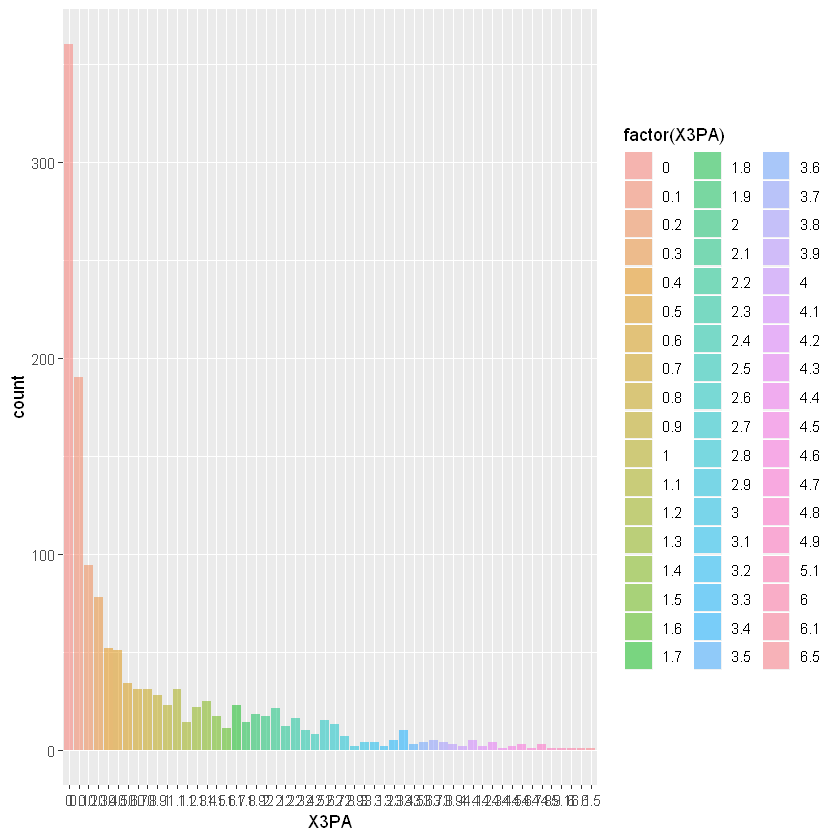

In [142]:
ggplot(df,aes(X3PA)) + geom_bar(aes(fill=factor(X3PA)),alpha=0.5) 

# The above graph shows that the points attempt made by players

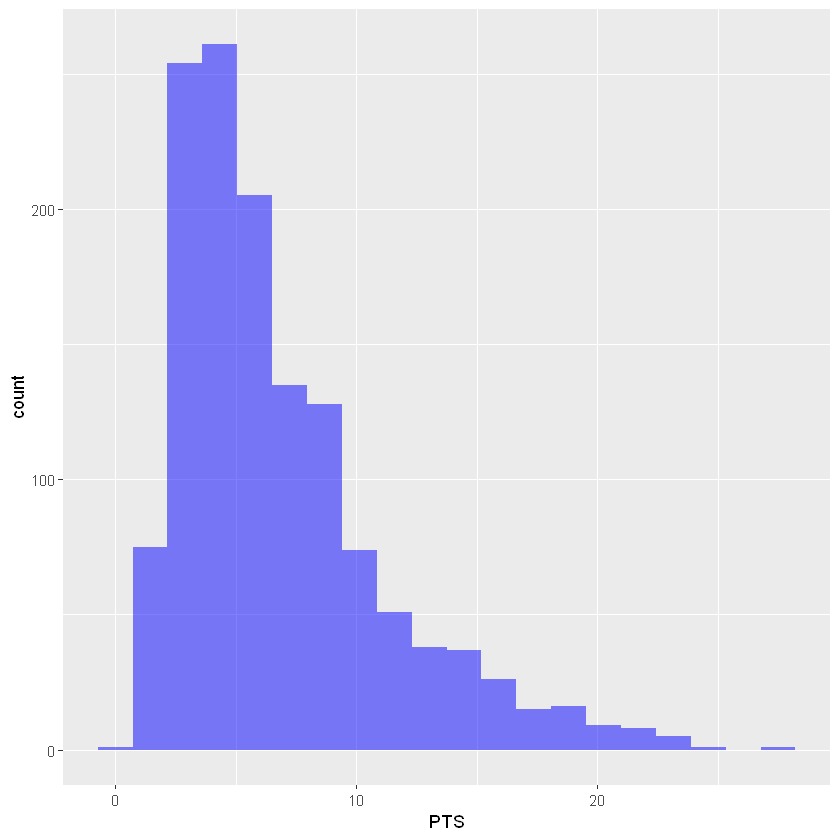

In [145]:
ggplot(df,aes(PTS)) + geom_histogram(fill='blue',bins=20,alpha=0.5)

# The mean of the points is between 0 and 10.

In [115]:
df <- select(df, -Name)

ERROR: Error in is_character(x): object 'Name' not found


# Drop the name column because it is not required for the model building 

In [47]:
library(caTools)
set.seed(101)

split = sample.split(df$TARGET_5Yrs, SplitRatio = 0.70)

final.train = subset(df, split == TRUE)
final.test = subset(df, split == FALSE)

# splitting the data into final.train and final.test using sample.split function

In [117]:
final.log.model <- glm(formula= TARGET_5Yrs ~ GP + X3P.Made , family = binomial(link='logit'),data = final.train)

# Training the model using final.train data and the dependent variable is target_5 years and independent variable is games played (GP) and 3 points made.

In [118]:
summary(final.log.model)


Call:
glm(formula = TARGET_5Yrs ~ GP + X3P.Made, family = binomial(link = "logit"), 
    data = final.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8881  -1.0624   0.6341   0.8684   1.8775  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.3433023  0.2661287  -8.805   <2e-16 ***
GP           0.0480641  0.0044478  10.806   <2e-16 ***
X3P.Made     0.0002999  0.1973492   0.002    0.999    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1245.4  on 937  degrees of freedom
Residual deviance: 1107.4  on 935  degrees of freedom
AIC: 1113.4

Number of Fisher Scoring iterations: 4


# Games played and 3 points made are the significant variables

In [120]:
fitted.probabilities <- predict(final.log.model,newdata=final.test,type='response')

# Using predict function and the data is final.test and storing the results in fitted.probabilities

In [121]:
fitted.results <- ifelse(fitted.probabilities > 0.5,1,0)

# Using ifelse condition setting the center value 0.5 and storing the values 0 and 1 in fitted.results.

In [125]:
misClasificError <- mean(fitted.results != final.test$TARGET_5Yrs)
print(paste('Accuracy',1-misClasificError))

[1] "Accuracy 0.696517412935323"


In [135]:
table(final.test$TARGET_5Yrs, fitted.probabilities > 0.5)

   
    FALSE TRUE
  0    69   84
  1    38  211

# confusion matrix
69 - predicted true negative
211 - predicted true positive

In [147]:
TP = 211
TN = 69
FP = 38
FN = 84

# Error Rate

In [150]:
error.rate = (FP+FN) / (TP+TN+FN+FP)
error.rate

[1] 0.3034826

# 0.3 is the error rate that the number of all incorrect predictions made by the model

# Accuracy

In [152]:
accuracy = (TP + TN) / (TP+TN+FN+FP)
accuracy

[1] 0.6965174

# 69% Total accuracy that the model predicted correct values

# sensitivity

In [154]:
SN = (TP) / (TP + FN)
SN

[1] 0.7152542

# 71% sensitivity is the number of correct positive predictions made by the model.

# Specificity

In [156]:
SP = (TN) / (TN + FP)
SP


[1] 0.6448598

# 64% is the percentage of true negative predictions made by the model.

# Precision

In [166]:
prec = (TP) / (TP + FP)
prec

[1] 0.8473896

# when the model predicts yes.We calculate how often is it correct.So the model is 84% correct.

# False Positive Rate

In [168]:
FPR = (FP) / (TN +  FP)
FPR

[1] 0.3551402

# false positive rate is when its actually no how often does it predict yes.so the model has  35% predicted yes.

In [129]:
library(pROC)

Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var



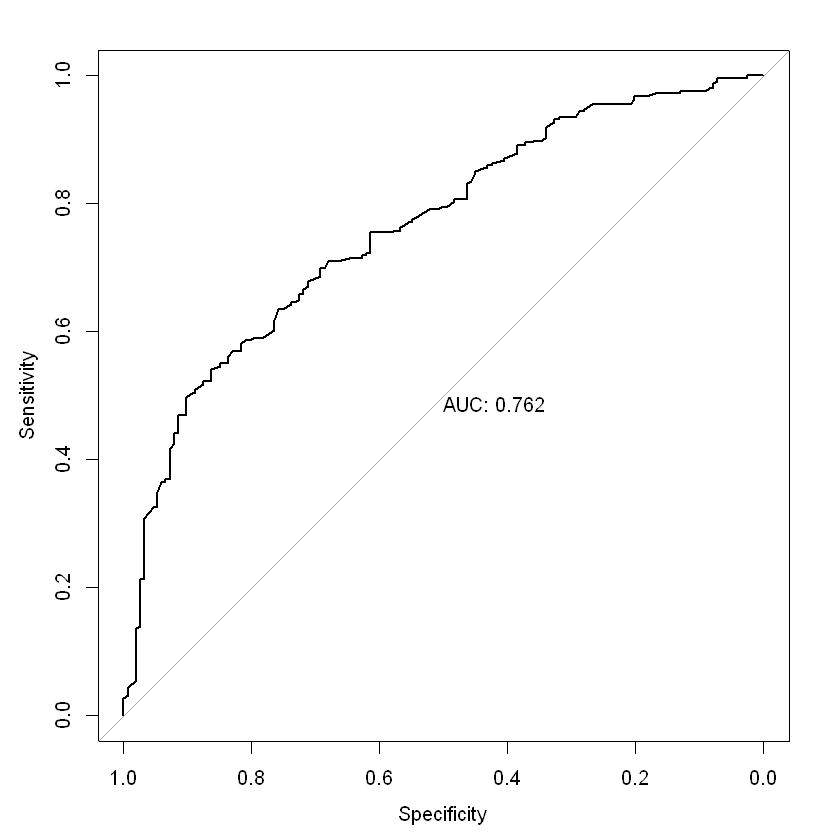

In [132]:
test_roc = roc(final.test$TARGET_5Yrs ~ fitted.probabilities, plot =TRUE, print.auc = TRUE)

# When Area under curve (AUC) is 0.76, it means there is 76% chance that model will be able to distinguish between positive class that is 1 and negative class that is 0 accurately.
